<a href="https://colab.research.google.com/github/Swastik3025/mnist-dataset/blob/main/mnist_digit_classification_using_SGDClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn


In [4]:
from sklearn.datasets import load_digits
mnist=load_digits() # creating the instance of load_digits dict
mnist

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [5]:
# knowing about the keys of the dict / dataset mnist
dir(mnist)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 432x288 with 0 Axes>

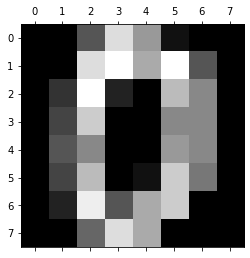

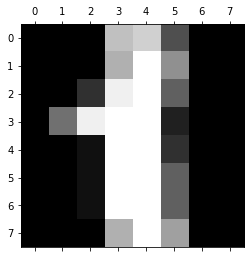

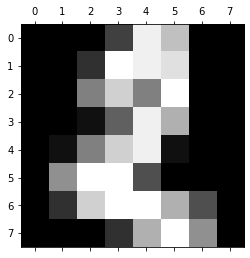

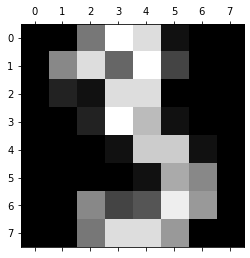

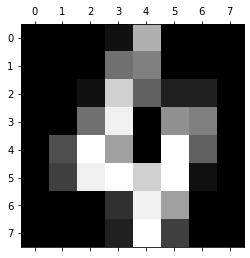

In [6]:
# visualizing the first 5 digits of the dataset
plt.gray()
for i in range(5):
  plt.matshow(mnist.images[i])

In [7]:
# extracting the input data and the corr. target values
X,y=mnist["data"],mnist["target"]
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [8]:
X[0]
X[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

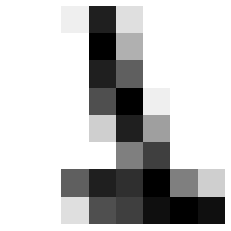

In [9]:
import matplotlib

# visualize the imput data
some_digit=X[1000] # is a 1d array
# reshaping the array as 8x8 (images in the dataset are 8x8 pixels)
some_digit_image=some_digit.reshape(8,8)
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary,interpolation="nearest")
plt.axis("off")
plt.show()

In [10]:
# moving towards model training

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15)

In [11]:
X_train.shape

(1527, 64)

In [12]:
y_train.shape

(1527,)

In [13]:
# X_train is a 2d array with each row as a 64 sized array containing the pixel densities

In [14]:
shuffle_index=np.random.permutation(1527) # for generating random X_train and y_train sets
X_train,y_train=X_train[shuffle_index],y_train[shuffle_index]

# above result can also be achieved by passing a parameter random_state in the function train_test_split

In [15]:
y_train_1=(y_train==1) # train set with target labels as '1'
y_test_1=(y_test==1) # test set with target labels as '1'

# we get y_train_1, y_test_1 as boolean array

# print(y_train_1)
# print(y_test_1)

In [16]:
# training the model for just classifying the digit '1'

from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_1)

SGDClassifier(random_state=42)

In [17]:
# some_digit=X[1000]
sgd_clf.predict([some_digit])

array([ True])

In [18]:
# instantiate the model
sgd_clf1=SGDClassifier(random_state=45)
sgd_clf1.fit(X_train,y_train)

SGDClassifier(random_state=45)

In [19]:
sgd_clf1.predict([some_digit])

array([1])

In [61]:
score = sgd_clf1.score(X_test,y_test)
print(f"The score is {score.round(8)}")

The score is 0.95185185


In [21]:
# it may happen that the model has overfit the data, so to get a generalised performance of the model, we perform k fold (stratified) cross validation
# stratified here means keeping the number ratio of different classes/features same across sub samples taken (preserving the percentage of samples for each class)

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [22]:
skfolds=StratifiedKFold(n_splits=3,shuffle=True,random_state=45)

scores = []

for train_index,test_index in skfolds.split(X_train,y_train):
  clone_clf=clone(sgd_clf1) # copy the model and train it every time for each fold
  X_train_folds=X_train[train_index]
  y_train_folds=y_train[train_index]
  X_test_fold=X_train[test_index]
  y_test_fold=y_train[test_index]
  clone_clf.fit(X_train_folds,y_train_folds)
  y_pred=clone_clf.predict(X_test_fold)
  n_correct=sum(y_pred==y_test_fold)
  scores.append((n_correct/len(y_pred)).round(8)) # n_correct/len(y_pred) gives the ratio of correct predictions

print(f"Scores:{scores}")

Scores:[0.93320236, 0.96070727, 0.95088409]


In [23]:
# above code can be greatly simplified using cross_val_score from sklearn.model_selection

from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(sgd_clf1,X_train,y_train,cv=3,scoring='accuracy')

print(f"Average model score: {cv_score.mean().round(8)}")

Average model score: 0.95219384


In [24]:
# predicting the output in consideration with the cross validation performance of the model

from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(sgd_clf1,X_train,y_train,cv=3)
y_train_pred

array([0, 8, 1, ..., 4, 2, 7])

In [25]:
# plot the confusion matrix to better evaluate the model performance

from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_train,y_train_pred)
cf

array([[139,   0,   0,   0,   1,   1,   0,   0,   0,   0],
       [  0, 145,   1,   1,   0,   1,   1,   0,   6,   2],
       [  0,   0, 153,   0,   0,   0,   0,   0,   2,   0],
       [  0,   0,   2, 138,   0,   5,   0,   2,   3,   3],
       [  1,   2,   0,   0, 145,   0,   1,   1,   0,   2],
       [  1,   1,   0,   0,   0, 155,   1,   0,   0,   2],
       [  0,   0,   1,   0,   2,   0, 153,   0,   0,   0],
       [  0,   0,   0,   1,   2,   0,   0, 147,   0,   5],
       [  1,   7,   0,   0,   1,   1,   0,   1, 136,   1],
       [  0,   0,   0,   0,   0,   2,   0,   2,   3, 143]], dtype=int64)

Text(51.0, 0.5, 'Actual')

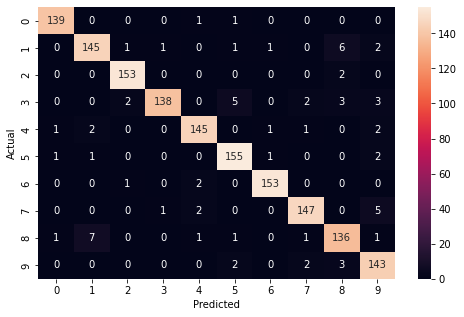

In [26]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.heatmap(cf,annot=True,fmt=',d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [28]:
from sklearn.metrics import classification_report

report = classification_report(y_train,y_train_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       141
           1       0.94      0.92      0.93       157
           2       0.97      0.99      0.98       155
           3       0.99      0.90      0.94       153
           4       0.96      0.95      0.96       152
           5       0.94      0.97      0.95       160
           6       0.98      0.98      0.98       156
           7       0.96      0.95      0.95       155
           8       0.91      0.92      0.91       148
           9       0.91      0.95      0.93       150

    accuracy                           0.95      1527
   macro avg       0.95      0.95      0.95      1527
weighted avg       0.95      0.95      0.95      1527



In [31]:
# now, testing our model on test data

model_score = sgd_clf1.score(X_test, y_test)
print(f"Model score on test data: {model_score.round(8)}")

Model score on test data: 0.95185185


In [32]:
y_test_pred = sgd_clf1.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test,y_test_pred)
cf

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 21,  0,  0,  2,  0,  0,  0,  2,  0],
       [ 0,  0, 22,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 27,  0,  0,  0,  0,  2,  1],
       [ 0,  0,  0,  0, 29,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 21,  0,  1,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 23,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 24,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 25,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  2, 28]], dtype=int64)

Text(51.0, 0.5, 'Actual')

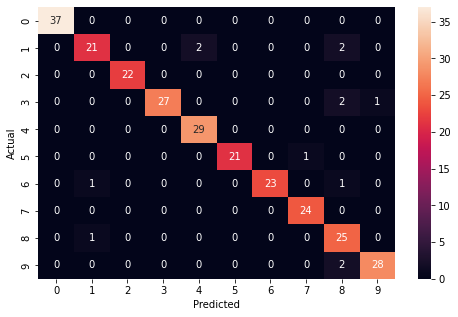

In [34]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.heatmap(cf,annot=True,fmt=',d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [36]:
from sklearn.metrics import classification_report

report = classification_report(y_test,y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.84      0.87        25
           2       1.00      1.00      1.00        22
           3       1.00      0.90      0.95        30
           4       0.94      1.00      0.97        29
           5       1.00      0.95      0.98        22
           6       1.00      0.92      0.96        25
           7       0.96      1.00      0.98        24
           8       0.78      0.96      0.86        26
           9       0.97      0.93      0.95        30

    accuracy                           0.95       270
   macro avg       0.96      0.95      0.95       270
weighted avg       0.96      0.95      0.95       270



In [27]:
# we can boost the performance of the model by hyperparameter tuning

In [51]:
# takes long time to run because GridSearchCV finds the best hyperparameters by manually training the data wrt to each combination of provided hyperparameters
# further tweaking of the hyperparameters can result in even better results

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit

def find_best_hyper_params_using_gridsearchcv(X,y):
    algos = { # a python dictionary
        'SGD_Classifier' : {
            'model': SGDClassifier(),
            'params': { # hyper parameter tuning
                'loss':['hinge', 'log_loss'],
                'penalty': ['l1', 'l2', 'elasticnet'],
                'alpha': [0.0001, 0.001, 0.01, 0.1],
                'max_iter': [1000, 5000, 10000, 20000]
            }
        }
    }
    mod_scores = []
    cv = StratifiedShuffleSplit(n_splits=5, test_size=0.15, random_state=42)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        mod_scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(mod_scores,columns=['model','best_score','best_params'])

performance = find_best_hyper_params_using_gridsearchcv(X_train, y_train)

c:\Users\TANMAY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\TANMAY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\TANMAY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\TANMAY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Co

In [52]:
performance

,model,best_score,best_params
0,SGD_Classifier,0.962609,"{'alpha': 0.1, 'loss': 'hinge', 'max_iter': 10..."


In [53]:
best_hp = performance["best_params"]

In [54]:
print(list(best_hp))

[{'alpha': 0.1, 'loss': 'hinge', 'max_iter': 10000, 'penalty': 'l2'}]


In [55]:
# let us train our model again with the found hyperparameters

SGD_Clf = SGDClassifier(alpha=0.1, loss='hinge', max_iter=10000, penalty='l2')
SGD_Clf.fit(X_train, y_train)

SGDClassifier(alpha=0.1, max_iter=10000)

In [56]:
y_pred_new = SGD_Clf.predict(X_test)

In [62]:
model_score_new = SGD_Clf.score(X_test, y_test)
print(f"Score after hyperparameter tuning: {model_score_new.round(8)}")

Score after hyperparameter tuning: 0.98518519


In [58]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test,y_pred_new)
cf

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 24,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, 22,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 29,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 22,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 24,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 24,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0, 25,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 30]], dtype=int64)

Text(51.0, 0.5, 'Actual')

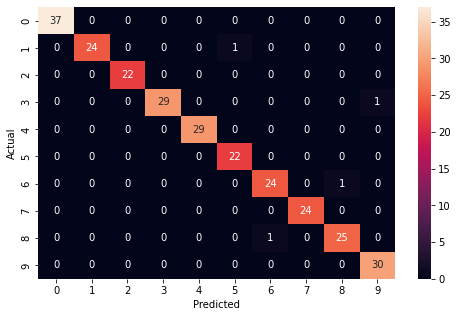

In [59]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.heatmap(cf,annot=True,fmt=',d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [60]:
from sklearn.metrics import classification_report

report = classification_report(y_test,y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.84      0.87        25
           2       1.00      1.00      1.00        22
           3       1.00      0.90      0.95        30
           4       0.94      1.00      0.97        29
           5       1.00      0.95      0.98        22
           6       1.00      0.92      0.96        25
           7       0.96      1.00      0.98        24
           8       0.78      0.96      0.86        26
           9       0.97      0.93      0.95        30

    accuracy                           0.95       270
   macro avg       0.96      0.95      0.95       270
weighted avg       0.96      0.95      0.95       270



we saw that, hyperparameter tuning improved the model performance from 0.95185185 to 0.98518519